## Observations and Insights 

1 - There is a pretty even distribution of male and female mice for the study.                                                 
2 - The Tumor volume data is relatively clean and does not have a lot of outliers.   
3 - The data for Capomulin regimen shows a high correlation between mouse weight and average tumor volume.                     
4 - There are no potentail outliers for Tumor Volume for data for last timepoint across all regimens


In [603]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [604]:
# Checking the number of mice.
merged_df["Mouse ID"].count()

1893

In [605]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicates_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [606]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"] == 'g989', :]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [607]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')


In [608]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].count()

1888

## Summary Statistics

In [609]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_mice_group = clean_mice.groupby('Drug Regimen')

mean = clean_mice_group['Tumor Volume (mm3)'].mean()
median = clean_mice_group['Tumor Volume (mm3)'].median()
variance = clean_mice_group['Tumor Volume (mm3)'].var(0)
std_dev = clean_mice_group['Tumor Volume (mm3)'].std()
SEM = clean_mice_group['Tumor Volume (mm3)'].sem()

# Generate a summary statistics table of mean, median, variance, std Dev, and SEM of the tumor volume for each regimen
summary_statistic = pd.DataFrame({"Mean": mean,
                                 "Median": median,
                                 "Variance":variance,
                                 "Std_Dev": std_dev,
                                 "SEM": SEM,
                                })
#print summary statistics
summary_statistic

Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.839296  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.069446  6.268188  0.469821
Infubinol     52.884795  51.820584  42.886388  6.567243  0.492236
Ketapril      55.235638  53.698743  68.188930  8.279709  0.603860
Naftisol      54.331565  52.509285  65.817708  8.134708  0.596466
Placebo       54.033581  52.288934  60.830138  7.821003  0.581331
Propriva      52.393463  50.909965  42.862273  6.568014  0.525862
Ramicane      40.216745  40.673236  23.383692  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.122106  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.266689  6.966589  0.516398

## Bar and Pie Charts

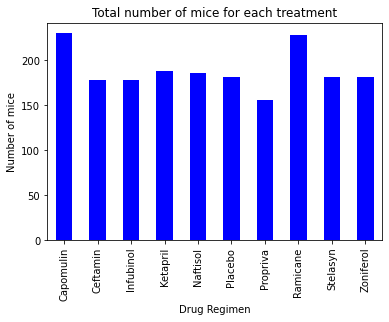

In [610]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Count how many times each maker appears in our group
mice_count = clean_mice_group['Tumor Volume (mm3)'].count()

# Create a bar chart  
count_chart = mice_count.plot(kind='bar',color='b')

# Set the labels 
count_chart.set_title("Total number of mice for each treatment")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of mice")
#show chart
plt.show()

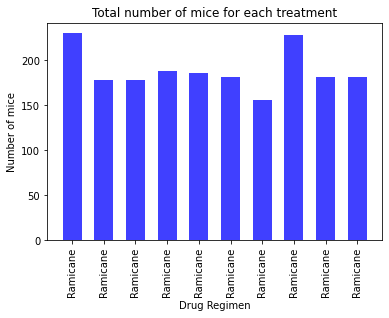

In [611]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(clean_mice_group))
tick_locations = [value for value in x_axis]

# Create a bar chart 
plt.bar(x_axis, mice_count, width=0.6, color= 'b', alpha=0.75, align="center")

# Set the labels 
plt.xticks(tick_locations, clean_mice['Drug Regimen'], rotation="vertical")
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()


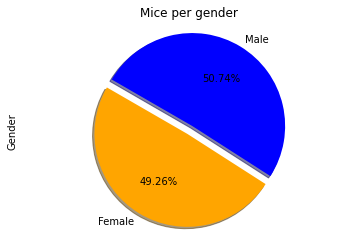

In [612]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Count mice by gender
mice_gender_group = clean_mice.groupby('Sex')
male_female = mice_gender_group['Mouse ID'].count()
colors = [ "orange", "blue"]
# Create a pie chart
explode = (0.1, 0)
pie_chart = male_female.plot(kind='pie', explode=explode, autopct='%1.2f%%', startangle=150, colors=colors, shadow=True)

# Set the labels 
pie_chart.set_title("Mice per gender")
pie_chart.set_ylabel("Gender")

#show chart
plt.axis("equal")
plt.show()

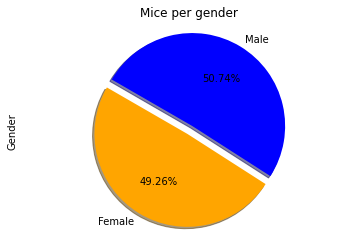

In [613]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#define chart lists for chart
labels = ["Female","Male"]
colors = ["orange", "blue"]
explode = (0.1, 0)

# Create a pie chart
plt.pie(male_female, explode = explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True,startangle=150)

#add chart titles
plt.title("Mice per gender")
plt.ylabel("Gender")

#show chart
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [644]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_ID_group = clean_mice.groupby('Mouse ID')
max_timepoint = mice_ID_group['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_timepoint = clean_mice.merge(max_timepoint,how='inner',left_on=["Mouse ID", "Timepoint"], 
                                        right_on=["Mouse ID", "Timepoint"])
#check the merged data
merged_max_timepoint

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
244     z314     Stelasyn  Female          21          28          5   
245     z435     Propriva  Female          12          26         10   
246     z581    Infubinol  Female          24          25         45   
247     z795     Naftisol  Female          13          29         45   
248     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
4             29.128472                 1  
..                  ...               ...  
244           45.934712                 0  
245           48.710661                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [668]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_max_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

 #all potential outliers
outliers = merged_max_timepoint.loc[(merged_max_timepoint['Tumor Volume (mm3)'] < lower_bound) |
                                             (merged_max_timepoint['Tumor Volume (mm3)'] > upper_bound)]

#print outliers
outliers   

The lower quartile of Tumor Volume is: 45.93471217
The upper quartile of Tumor Volume is: 64.95756185
The interquartile range of Tumor Volume is: 19.022849680000007
The the median of Tumor Volume is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [616]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Identify data which contain mice on each drug and get the tumor volumes
reduced_mice = merged_max_timepoint[merged_max_timepoint['Drug Regimen'].isin(treatments)]
reduced_mice

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
235     x822     Ceftamin    Male           3          29         45   
237     y163    Infubinol  Female          17          27         45   
241     y769     Ceftamin  Female           6          27         45   
242     y865     Ceftamin    Male          23          26         45   
246     z581    Infubinol  Female          24          25         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
4             29.128472                 1  
..                  ...               ...  
235           61.386660                 3  
237           67.685569                 3  
241           68.594745                 4  
242           64.729837                 3  
246           62.754451                 3  

[100 rows x 8 columns]

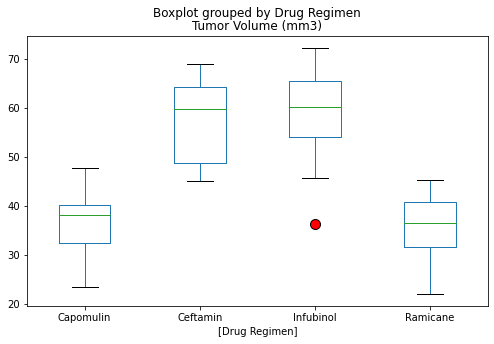

In [617]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none')
reduced_mice.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'], grid=False, figsize=(8,5), 
                     flierprops=flierprops)


## Line and Scatter Plots

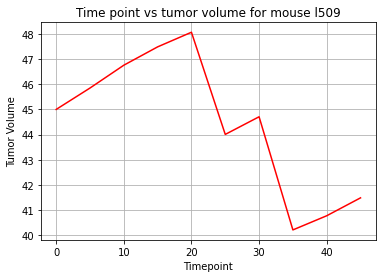

In [618]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = clean_mice[clean_mice['Drug Regimen'].str.contains('Capomulin')]

#pick a mice on Capomulin
mouse_id = "l509"
Capomulin_l509 = clean_mice.loc[(clean_mice['Mouse ID'] == mouse_id)]
plt.plot(Capomulin_l509['Timepoint'], Capomulin_l509['Tumor Volume (mm3)'], color="red")

#label the chart
plt.title(f"Time point vs tumor volume for mouse {mouse_id}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

#add grid and show chart
plt.grid()
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

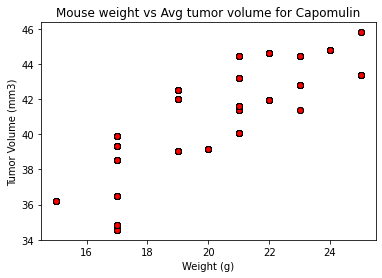

In [642]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group by mouse Id , calculate Avg Tumor volume and reset index
Capomulin_group =  Capomulin.groupby('Mouse ID')
Avg_tumor = Capomulin_group['Tumor Volume (mm3)'].mean().reset_index()

#merge Avg_tumor with Capomulin
merged_tumor = Capomulin.merge(Avg_tumor,how='inner',left_on=["Mouse ID"], right_on=["Mouse ID"])
merged_tumor = merged_tumor.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3)",
                                            "Tumor Volume (mm3)_y": "Avg Tumor Volume (mm3)"})

# draw a scatter plot
plt.scatter(merged_tumor['Weight (g)'], merged_tumor['Avg Tumor Volume (mm3)'], 
            marker="o", facecolors="red", edgecolors="black")

#label the chart
plt.title("Mouse weight vs Avg tumor volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.83


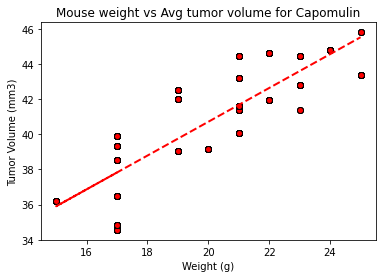

In [667]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
corr = round(st.pearsonr(merged_tumor['Weight (g)'], merged_tumor['Avg Tumor Volume (mm3)'])[0],2)
print("The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is " + str(corr))

# linear regression model
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(merged_tumor['Weight (g)'], merged_tumor['Avg Tumor Volume (mm3)'])
m_fit = m_slope * merged_tumor['Weight (g)'] + m_int


plt.scatter(merged_tumor['Weight (g)'], merged_tumor['Avg Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black")
plt.plot(merged_tumor['Weight (g)'],m_fit,"r--", linewidth=2)
#label the chart
plt.title("Mouse weight vs Avg tumor volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
